In [7]:
from timeit import repeat
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def sundaram(n):
    primes = []
    k = (n - 2) // 2
    integers_list = [True] * (k+1)
    for i in range(1, k + 1):
        j = i
        while i + j + 2 * i * j <= k:
            integers_list[i + j + 2 * i * j] = False
            j += 1
    if n > 2:
        primes.append(2)
    for i in range(1, k + 1):
        if integers_list[i]:
            primes.append(2 * i + 1)
    return np.array(primes)

In [9]:
def eratosthenes(n):
    multiples = []
    primes = []
    for i in range(2, n+1):
        if i not in multiples:
            primes.append(i)
            for j in range(i*i, n+1, i):
                multiples.append(j)
    return np.array(primes)

Text(0.5, 0, 'N')

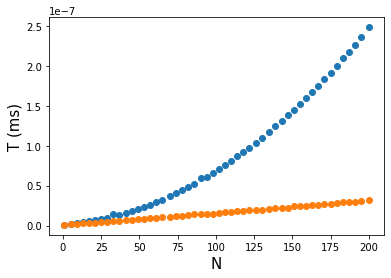

In [10]:
Ns = np.linspace(1, 2*10**2, 50, dtype="int64")
Er = []
Sun = []
for N in Ns:
    sund = f"sundaram({N})"
    erat = f"eratosthenes({N})"
    Er.append(min(repeat(erat, number=1, repeat=100, globals=globals())))
    Sun.append(min(repeat(sund, number=1, repeat=100, globals=globals())))

Er = np.array(Er)
Sun = np.array(Sun)
plt.scatter(Ns, Er/1000.0)
plt.scatter(Ns, Sun/1000.0)
plt.ylabel("T (ms)", fontsize=15)
plt.xlabel("N", fontsize=15)


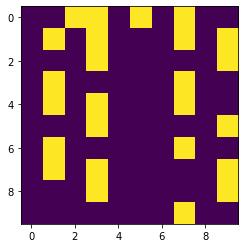

In [12]:
def colorin(n, primes):
    ar = np.zeros(n, dtype="int8")
    ar[primes] = 1
    return ar

n = 10
ar = colorin(n**2, sundaram(n**2))
A = ar.reshape((n,n))

plt.imshow(A)

In [44]:
steps = []
M = np.linspace(0,10**5, 25, dtype="int64")

for m in M:
    s = 0
    for i in range(1,m):
        limit = (m-i)//(2*i+1) + 1
        for j in range(i, limit):
            s += 1
    steps.append(s)

In [29]:
def nlogn(m, k):
    return m*np.log(m)/k

/home/marco/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/marco/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


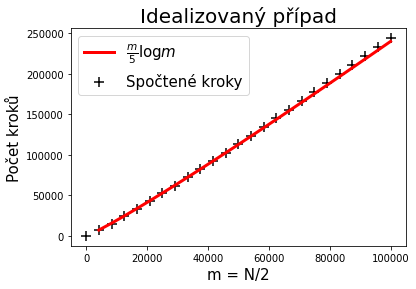

In [54]:



plt.scatter(M, steps, marker="+", s=100, c="k", label="Spočtené kroky")
plt.plot(M, nlogn(M, 4.8), c="r", linewidth=3, label="$\\frac{m}{5} \log m$")

plt.title("Idealizovaný případ", fontsize=20)
plt.ylabel("Počet kroků", fontsize=15)
plt.xlabel("m = N/2", fontsize=15)
plt.legend(fontsize=15)